# **Music Recommendation System**

By Dabidin Keshika

## **Problem Definition**

**The context:** Why is this problem important to solve?<br>

Internet-based entertainment companies rely significantly on the time spent by the consumers on their platform. It is essential for stakeholders to understand the type of content that is appreciated and enhances the time spent by and the experience of customers.
Spotify is an international content provider which regularly releases a large volume and wide array of music online. Spotify users have little time to find and consume content that suits them. The Company has increased its market size considerably because of its ability to efficiently recommend the next song to be played by their consumers. In order to do that, smart recommendation systems are used. These can understand and process the users’ musical taste and provide relevant suggestions to the platform.


**The objectives:** What is the intended goal?<br>
In this project, we propose to implement and build a machine learning pipeline that combines content-based, collaborative recommendation engines as well as popularity-based systems to predict which songs a user will enjoy and recommend a list of 10 relevant songs to the user.




**The key questions:** What are the key questions that need to be answered?<br>

We have access to the user’s listening history and data concerning the listened songs from the ‘Million Songs Dataset’.

To guide our exploration, there are some key questions that should be answered –
1.	Which conditions need to be satisfied to achieve a good performance on collaborative-based recommendation?
2.	Which method is suitable to apply in different cases?
3.	How to measure similarities between songs?
4.	How to build a suitable content-based recommendation method for this dataset?
5.	How to measure the recommender system performance?


**The problem formulation:** What are we trying to solve using data science?


Finally, we will build a recommendation engine for songs in Spotify using the Million Songs Dataset. The following methods can be used to present recommendations.

•	Content-based – using keywords in the song or related titles (based on the keywords);

•	Collaborative Filtering – user-to-user similarity searches and item-to-item similarity searches;

•	Popularity-based – using the number of times a user listens to a song, it will give you suggestions;

•	Cluster-based – exploring the similarities and differences in people's tastes in songs whilst clustering similar groups together; and,

•	Content-based – using keywords in the song or related titles (based on the keywords).






## **Data Dictionary**

The core data is the Taste Profile Subset released by the Echo Nest as part of the Million Song Dataset. There are two files in this dataset. The **first file** contains the details about the **song id**, **titles**, **release**, **artist name**, and the **year of release**. The second file contains the **user id**, **song id**, and the **play count** of users.

**song_data**

song_id - A unique id given to every song

title - Title of the song

Release - Name of the released album

Artist_name - Name of the artist

year - Year of release

**count_data**

user _id - A unique id given to the user

song_id - A unique id given to the song

play_count - Number of times the song was played

## **Data Source**
http://millionsongdataset.com/

### **Importing Libraries and the Dataset**

In [ ]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Used to ignore the warning given as output of the code
import warnings
warnings.filterwarnings('ignore')

# Basic libraries of python for numeric and dataframe computations
import numpy as np
import pandas as pd

# Basic library for data visualization
import matplotlib.pyplot as plt

# Slightly advanced library for data visualization
import seaborn as sns

# To compute the cosine similarity between two vectors
from sklearn.metrics.pairwise import cosine_similarity

# A dictionary output that does not raise a key error
from collections import defaultdict

# A performance metrics in sklearn
from sklearn.metrics import mean_squared_error

### **Load the dataset**

In [ ]:
# Importing the datasets
# Change the path accordingly
count_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Capstone/count_data.csv')
song_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Capstone/song_data.csv')

### **Understanding the data by viewing a few observations**

In [ ]:
# See the first 10 records of count_df data
count_df.head(10)

,Unnamed: 0,user_id,song_id,play_count
0,0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1
5,5,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODDNQT12A6D4F5F7E,5
6,6,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODXRTY12AB0180F3B,1
7,7,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFGUAY12AB017B0A8,1
8,8,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFRQTD12A81C233C0,1
9,9,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOHQWYZ12A6D4FA701,1


In [ ]:
# See the first 10 records of song_df data
song_df.head(10)

,song_id,title,release,artist_name,year
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0
5,SOZVAPQ12A8C13B63C,"Symphony No. 1 G minor ""Sinfonie Serieuse""/All...",Berwald: Symphonies Nos. 1/2/3/4,David Montgomery,0
6,SOQVRHI12A6D4FB2D7,We Have Got Love,Strictly The Best Vol. 34,Sasha / Turbulence,0
7,SOEYRFT12AB018936C,2 Da Beat Ch'yall,Da Bomb,Kris Kross,1993
8,SOPMIYT12A6D4F851E,Goodbye,Danny Boy,Joseph Locke,0
9,SOJCFMH12A8C13B0C2,Mama_ mama can't you see ?,March to cadence with the US marines,The Sun Harbor's Chorus-Documentary Recordings,0


### **Let us check the data types and and missing values of each column**

In [ ]:
# See the info of the count_df data
count_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 4 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   Unnamed: 0  int64 
 1   user_id     object
 2   song_id     object
 3   play_count  int64 
dtypes: int64(2), object(2)
memory usage: 61.0+ MB


In [ ]:
# See the info of the song_df data
song_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   song_id      1000000 non-null  object
 1   title        999985 non-null   object
 2   release      999995 non-null   object
 3   artist_name  1000000 non-null  object
 4   year         1000000 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 38.1+ MB


#### **Observations and Insights:**
In **count_df**, there are **2,000,000 rows** and **4 columns** :
- The **Unnamed : 0 column** gives the number of the record and is of int64 type.
- The **user_id** and the **song_id** gives the unique id of the user or the song respectively and these columns are of object type.
- The **play_count** gives the number of times a song has been played and is of int64 type.

We can use this dataset for the recommendation system.

We will not need the **Unnamed : 0** column for our analysis. Hence, we can drop this column.

In **song_df**, there are **1,000,000 rows** and **5 columns** :

- The **song_id**, **title**, **release**, and **artist_name** give the song identification, the title of the song, the name of the released album and the artist related respectively. These columns are of object type.

The song_id column can be used as a common key with the previous dataset to combine both datasets.

- The **year** column gives the year during which the song was released. The data of this column is of int64 type.

**We can also conclude that for the users data we have 2,000,000 samples while we have 1,000,000 songs available in the songs data**

In [ ]:
# Left merge the count_df and song_df data on "song_id". Drop duplicates from song_df data simultaneously
songs=pd.merge(count_df,song_df.drop_duplicates(['song_id']),on='song_id',how='left')
# Drop the column 'Unnamed: 0'
songs=songs.drop(['Unnamed: 0'], axis = 1)
songs.head()

,user_id,song_id,play_count,title,release,artist_name,year
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999


**Think About It:** *As the user_id and song_id are encrypted. Can they be encoded to numeric features?*

Some machine learning libraries do not take categorical variables as input. Thus, we convert them into numerical variables.
One of the methods used to convert a categorical (string) input to numerical variables is the label encoder.
It is used to transform non-numerical labels to numerical labels (or nominal categorical variables). Numerical labels are always between 0 and n_classes-1.


In [ ]:
# Apply label encoding for "user_id" and "song_id"

# Import label encoder
from sklearn import preprocessing

# The label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encoding labels in columns "user_id" and "song_id".
songs['user_id']= label_encoder.fit_transform(songs['user_id'])
songs['song_id']= label_encoder.fit_transform(songs['song_id'])
df=songs
df.head()

,user_id,song_id,play_count,title,release,artist_name,year
0,54961,153,1,The Cove,Thicker Than Water,Jack Johnson,0
1,54961,413,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,54961,736,1,Stronger,Graduation,Kanye West,2007
3,54961,750,1,Constellations,In Between Dreams,Jack Johnson,2005
4,54961,1188,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999


**Think About It:** As the data also contains users who have listened to very few songs and vice versa, is it required to filter the data so that it contains users who have listened to a good count of songs and vice versa?

Yes, it is recommended to filter the data so as to have a reliable source for building the recommendation systems - i.e include reliable 'hit' songs and reliable users.

In [ ]:
# Get the column containing the users
users = df.user_id

# Create a dictionary from users to their number of songs
ratings_count = dict()

for user in users:
    # If we already have the user, just add 1 to their rating count
    if user in ratings_count:
        ratings_count[user] += 1

    # Otherwise, set their rating count to 1
    else:
        ratings_count[user] = 1

In [ ]:
# We want our users to have listened at least 90 songs
RATINGS_CUTOFF = 90

# Create a list of users who need to be removed
remove_users = []

for user, num_ratings in ratings_count.items():

    if num_ratings < RATINGS_CUTOFF:
        remove_users.append(user)

df = df.loc[ ~ df.user_id.isin(remove_users)]

In [ ]:
# Get the column containing the songs
songs = df.song_id

# Create a dictionary from songs to their number of users
ratings_count = dict()

for song in songs:
    # If we already have the song, just add 1 to their rating count
    if song in ratings_count:
        ratings_count[song] += 1

    # Otherwise, set their rating count to 1
    else:
        ratings_count[song] = 1

In [ ]:
# We want our song to be listened by atleast 120 users to be considered
RATINGS_CUTOFF = 120

remove_songs = []

for song, num_ratings in ratings_count.items():
    if num_ratings < RATINGS_CUTOFF:
        remove_songs.append(song)

df_final= df.loc[ ~ df.song_id.isin(remove_songs)]


In [ ]:
# Drop records with play_count more than(>) 5
df_final.drop(df_final[df_final['play_count'] > 5].index, inplace = True)
df_final.head()

,user_id,song_id,play_count,title,release,artist_name,year
200,6958,447,1,Daisy And Prudence,Distillation,Erin McKeown,2000
202,6958,512,1,The Ballad of Michael Valentine,Sawdust,The Killers,2004
203,6958,549,1,I Stand Corrected (Album),Vampire Weekend,Vampire Weekend,2007
204,6958,703,1,They Might Follow You,Tiny Vipers,Tiny Vipers,2007
205,6958,719,1,Monkey Man,You Know I'm No Good,Amy Winehouse,2007


In [ ]:
# Check the shape of the data
df_final.shape


(117876, 7)

## **Exploratory Data Analysis**

### **Let's check the total number of unique users, songs, artists in the data**

Total number of unique user id

In [ ]:
# Display total number of unique user_id
df_final['user_id'].nunique()

3155

Total number of unique song id

In [ ]:
# Display total number of unique song_id
df_final['song_id'].nunique()

563

Total number of unique artists

In [ ]:
# Display total number of unique artists
df_final['artist_name'].nunique()

232

#### **Observations and Insights:**
There are **563** unique songs ,**232** unique artists and **3155** unique users in the dataset.
As per the number of unique users and songs, there is a possibility of 3155 * 563 = **1,776,265** playcounts in the dataset. But we only have **117,876** playcounts in the dataframe, i.e., not every user has listened to every song in the dataset. This creates the possibility of building a recommendation system to recommend song to the users which they have not interacted with by using collaborative filtering methods such as:
- Similarity/Neighborhood based

  - User-User Similarity Based
  - Item-Item similarity based
- Model based (matrix factorization)


### **Let's find out about the most interacted songs and interacted users**

Most interacted songs

In [ ]:
# Counting the number of listeners for a certain song
df_final['song_id'].value_counts()

8582    751
352     748
2220    713
1118    662
4152    652
       ... 
9048    103
6450    102
990     101
4831     97
8324     96
Name: song_id, Length: 563, dtype: int64

Most interacted users

In [ ]:
# Counting the number of songs each user has watched
df_final['user_id'].value_counts()

61472    243
15733    227
37049    202
9570     184
23337    177
        ... 
19776      1
45476      1
17961      1
14439      1
10412      1
Name: user_id, Length: 3155, dtype: int64

#### **Observations and Insights:**
- The song **8582** has interacted **751** times with users. But still, there is a possibility of 3155- 751 = 2404 more interactions as we have 3155 unique users in our dataset. For those 2404 remaining users, we can build a recommendation system to predict who is most likely to interact with this song.

- The user **61472** has interacted with the most number of songs - **243** songs.
But still, there is a possibility of 563 - 243 = 320 more interactions as we have 563 unique songs in our dataset. For those 320 remaining songs, we can build a recommendation system to predict which songs are most likely to be listened by this user.


Songs played in a year

In [ ]:
count_songs = df_final.groupby('year').count()['title']

count = pd.DataFrame(count_songs)

count.drop(count.index[0], inplace = True)

count.tail()

,title
year,
2006,7592
2007,13750
2008,14031
2009,16351
2010,4087


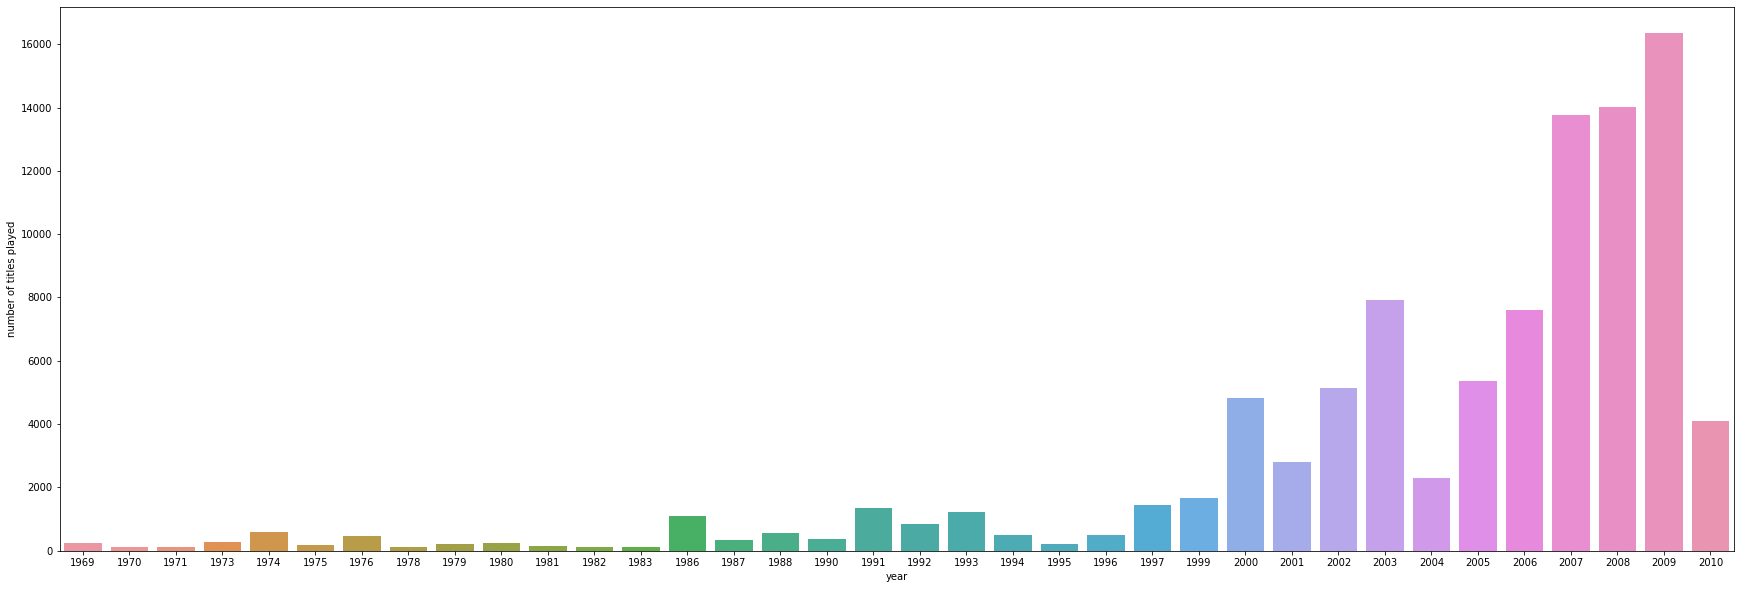

In [ ]:
# Create the plot

# Set the figure size
plt.figure(figsize = (30, 10))

sns.barplot(x = count.index,
            y = 'title',
            data = count,
            estimator = np.median)

# Set the y label of the plot
plt.ylabel('number of titles played')

# Show the plot
plt.show()

#### **Observations and Insights:**

The number of titles played has increased widely until 2009. The maximum number of titles played occurs for the songs released in 2009.

**Think About It:** What other insights can be drawn using exploratory data analysis?

We can firstly find out whether there is any song that has interacted with more than once with the same user.

We can perform summary statistics on the songs so as to have an idea of the distribution.

In [ ]:

# Finding the sum of ratings count by user-movie pair
df_final.groupby(['user_id', 'song_id']).count()['play_count'].sum()

117876

#### **Observations and Insights:**

The sum is equal to the total number of observations, which implies that there is only one interaction between a pair of a song and a user.


We can also investigate on the distribution of the user-song interactions in this dataset :

In [ ]:
# Finding user-song interactions distribution
count_interactions = df_final.groupby('user_id').count()['song_id']
count_interactions

user_id
11        3
17       34
57       24
84       42
120       7
         ..
76300    37
76307    21
76331    19
76342     8
76347     1
Name: song_id, Length: 3155, dtype: int64

## **Proposed approach**
**Potential techniques:** What different techniques should be explored?<br>
We can explore the following techniques for this project:

•	Rank-based (using averages);

•	User-to-User similarity-based collaborative filtering;

•	Item-to-Item similarity-based collaborative filtering;

•	Model-based collaborative filtering (matrix factorization);

•	Cluster Based Recommendation Systems; and,

•	Content Based Recommendation Systems.


**Overall solution design:** What is the potential solution design?<br>
1.	*Popularity-Based Recommendation Systems*

•	Taking the count and sum of play counts of the songs and building the popularity recommendation systems based on the sum of play counts.

•	Finding the top n songs for a recommendation based on the average play count of song.

2.	*User-to-User and Item-to-Item Similarity-Based Collaborative Filtering*

•	Using the surprise library to build this model and the other following models.

•	Creating the user-item interaction data.

•	Building the model by choosing a similarity-based recommendation system using cosine similarity and using KNN to find similar users which are the nearest neighbor to the given user.

•	Calculating precision@k and recall@k, RMSE and F1_Score@k to evaluate the model performance.

•	Calculating RMSE to check how far the overall predicted ratings are from the actual ratings.

•	Adjusting the hyperparameters such as k, min_k, sim_option, et cetera to adjust the model in accordance with GridSearchCV.

•	Predicting the rating with the optimized model.

3.	*Model-based collaborative filtering (matrix factorization)*

It is a personalized recommendation system whereby suggestions are based on the past behavior of the user and it is not dependent on any additional information. We use latent features to find recommendations for each user. We can follow the steps presented below to build the recommendation system.

•	Building a baseline matrix factorization recommendation system.

•	Making prediction for user i to song j and making a prediction for the user i who has not listened to the song j.

•	Tuning the hyperparameters to optimize the model using SVD.

•	Using the optimized model to predict.

4.	*Cluster Based Recommendation System*

•	Clustering similar users together and recommend songs to a user based on playcounts from other users in the same cluster.

•	Tuning the hyperparameters and using the optimized Coclustering model to make predictions.

5.	*Content Based Recommendation Systems*

•	Using the song features such as the title, artist name, release year to make recommendations,
we can concatenate that information into a text.

•	Using the packages to work with text format from the nlkt library.

•	Pre-processing the text data by tokenizing for example.

•	Recommending songs using text search.



**Measures of success:** What are the key measures of success to compare different potential techniques?<br>


For Similarity-Based Collaborative Filtering methods, functions such as precision@k and recall@k, RMSE and F1_Score@k are used to evaluate the model performance. The Precision@k is the fraction of recommended items that are relevant in top k predictions. Recall@k is the fraction of relevant items that are recommended to the user in top k predictions. The F1-score@k is the harmonic mean of Precision@k and Recall@k and thus, takes into account both of the parameters.

It is interesting to look directly at the F1-score@k to consider both parameters. Moreover, we can change k and text different values to optimize the model. We can also change the threshold value and the test size to improve the model.

Concerning the cluster-based recommendation system, we can adjust the number of nearest neighbors to vary the size of the cluster and optimize our predictions. According to the predictions made on the test set, we can choose one type of recommendation system over another.

Finally, we can also combine different recommendation techniques to build hybrid recommendation systems.




**Now that we have explored the data, let's apply different algorithms to build recommendation systems.**

### **1.Popularity-Based Recommendation Systems**

Let's take the count and sum of play counts of the songs and build the popularity recommendation systems based on the sum of play counts.

In [ ]:
# Calculating average play_count
average_count = df_final.groupby('song_id').mean()['play_count']       # Hint: Use groupby function on the song_id column

# Calculating the frequency a song is played
play_freq = df_final.groupby('song_id').count()['play_count']         # Hint: Use groupby function on the song_id column

In [ ]:
# Making a dataframe with the average_count and play_freq
final_play = pd.DataFrame({'avg_count':average_count, 'play_freq':play_freq})

# Let us see the first five records of the final_play dataset
final_play.sort_values(by='play_freq', ascending=False).head()

,avg_count,play_freq
song_id,,
8582,1.948069,751
352,2.184492,748
2220,2.220196,713
1118,1.817221,662
4152,1.930982,652


Now, let's create a function to find the top n songs for a recommendation based on the average play count of song. We can also add a threshold for a minimum number of playcounts for a song to be considered for recommendation.

In [ ]:
# Build the function to find top n songs
def top_n_songs (data,n,min_interaction=100):

    # Finding songs with interactions greater than the minimum number of interactions
    recommendations = data[data['play_freq'] > min_interaction]

    # Sorting values with respect to the average play count
    recommendations = recommendations.sort_values(by = 'avg_count', ascending = False)

    return recommendations.index[:n]

In [ ]:
# Recommend top 10 songs using the function defined above
list(top_n_songs(final_play,10,100))

[7224, 6450, 9942, 5531, 5653, 8483, 2220, 657, 614, 352]

### **2.User User Similarity-Based Collaborative Filtering**

To build the user-user-similarity-based and subsequent models we will use the "surprise" library.


In [ ]:
# Install the surprise package using pip. Uncomment and run the below code to do the same
!pip install surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 771 kB 4.1 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp38-cp38-linux_x86_64.whl size=2626488 sha256=60bbfb19e257d35430bccd9084adc046e77414ebeeb14a09da358739995670a6
  Stored in directory: /root/.cache/pip/wheels/af/db/86/2c18183a80ba05da35bf0fb7417aac5cddbd93bcb1b92fd3ea
Successfully built scikit-surprise


In [ ]:
# Import necessary libraries

# To compute the accuracy of models
from surprise import accuracy

# This class is used to parse a file containing play_counts, data should be in structure - user; item; play_count
from surprise.reader import Reader

# Class for loading datasets
from surprise.dataset import Dataset

# For tuning model hyperparameters
from surprise.model_selection import GridSearchCV

# For splitting the data in train and test dataset
from surprise.model_selection import train_test_split

# For implementing similarity-based recommendation system
from surprise.prediction_algorithms.knns import KNNBasic

# For implementing matrix factorization based recommendation system
from surprise.prediction_algorithms.matrix_factorization import SVD

# For implementing KFold cross-validation
from surprise.model_selection import KFold

# For implementing clustering-based recommendation system
from surprise import CoClustering

### Some useful functions

Below is the function to calculate precision@k and recall@k, RMSE and F1_Score@k to evaluate the model performance.

**Think About It:** Which metric should be used for this problem to compare different models?

To compare different models, we can use the RMSE and the F1_Score@k since it takes into account both the precision and the recall of the model. To optimize the model, we would like to minimize the RMSE and increase the F1_Score@k.


In [ ]:
# The function to calulate the RMSE, precision@k, recall@k, and F_1 score
def precision_recall_at_k(model, k = 30, threshold = 1.5):
    """Return precision and recall at k metrics for each user"""

    # First map the predictions to each user.
    user_est_true = defaultdict(list)

    # Making predictions on the test data
    predictions=model.test(testset)

    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key = lambda x : x[0], reverse = True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[ : k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[ : k])

        # Precision@K: Proportion of recommended items that are relevant
        # When n_rec_k is 0, Precision is undefined. We here set Precision to 0 when n_rec_k is 0

        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        # Recall@K: Proportion of relevant items that are recommended
        # When n_rel is 0, Recall is undefined. We here set Recall to 0 when n_rel is 0

        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0

    # Mean of all the predicted precisions are calculated
    precision = round((sum(prec for prec in precisions.values()) / len(precisions)), 3)

    # Mean of all the predicted recalls are calculated
    recall = round((sum(rec for rec in recalls.values()) / len(recalls)), 3)

    accuracy.rmse(predictions)

    # Command to print the overall precision
    print('Precision: ', precision)

    # Command to print the overall recall
    print('Recall: ', recall)

    # Formula to compute the F-1 score
    print('F_1 score: ', round((2 * precision * recall) / (precision + recall), 3))

**Think About It:** In the function precision_recall_at_k above the threshold value used is 1.5. How precision and recall are affected by changing the threshold? What is the intuition behind using the threshold value of 1.5?

The higher the threshold, the higher the precision, but the lower the recall. The ideal threshold setting is the highest possible recall and precision rate which implies making a smart compromise by finding a value which optimizes the F1_Score@k.

In [ ]:
# Instantiating Reader scale with expected rating scale
reader = Reader(rating_scale=(0,5)) #use rating scale (0, 5)

# Loading the dataset
data = Dataset.load_from_df(df_final[['user_id', 'song_id', 'play_count']], reader) # Take only "user_id","song_id", and "play_count"

# Splitting the data into train and test dataset
trainset, testset = train_test_split(data, test_size=0.4, random_state = 42) # Take test_size = 0.4

**Think About It:** How changing the test size would change the results and outputs?

Decreasing the test size implies that the training data has been increased and the fit will be improved, however, overfitting might occur and one must be careful when choosing the training size and testing size of the data set. Ideally, we should train our model with enough data to find a fit that will work well also on our test data.

In [ ]:
# Build the default user-user-similarity model
sim_options = {'name': 'cosine',
               'user_based':True}

# KNN algorithm is used to find desired similar items
sim_user_user = KNNBasic(sim_options = sim_options, verbose = False, random_state = 1) # Use random_state = 1

# Train the algorithm on the trainset, and predict play_count for the testset
sim_user_user.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 30
precision_recall_at_k(sim_user_user,k=30) # Use sim_user_user model

RMSE: 1.0878
Precision:  0.396
Recall:  0.692
F_1 score:  0.504


**Observations and Insights:**
- We have calculated RMSE  of 1.0878 to check how far the overall predicted ratings are from the actual ratings.
- We are getting a recall of ~0.692, which means out of all the relevant songs 69,2% are recommended.
- We are getting a precision of ~ 0.39,6, which means out of all the recommended songs 39,2% are relevant.
- The F_1 score of the baseline model is ~0.504. We will try to improve this later by using GridSearchCV by tuning different hyperparameters of this algorithm.

In [ ]:
# Predicting play_count for a sample user with a listened song
sim_user_user.predict(6958, 1671, r_ui = 2, verbose = True) # Use user id 6958 and song_id 1671

user: 6958       item: 1671       r_ui = 2.00   est = 1.80   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.8009387435128914, details={'actual_k': 40, 'was_impossible': False})

In [ ]:
# Predicting play_count for a sample user with a song not-listened by the user
sim_user_user.predict(6958,3232, verbose = True) # Use user_id 6958 and song_id 3232

user: 6958       item: 3232       r_ui = None   est = 1.64   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.6386860897998294, details={'actual_k': 40, 'was_impossible': False})

**Observations and Insights:**

The above output shows that the actual play_count of 2 is not so far from the predicted count of 1.80 for this user-item pair by this user-user-similarity-based baseline model.

The output also contains "actual_k". It is the value of K in KNN that is used while training the model. The default value is 40.

We have also predicted the play_count of 1.64 for the song 3232 for this user-item pair based on this user-user similarity-based baseline model.

Now, let's try to tune the model and see if we can improve the model performance.

In [ ]:
# Setting up parameter grid to tune the hyperparameters
param_grid = {'k': [30, 40, 50], 'min_k': [3, 6, 9],
              'sim_options': {'name': ['msd', 'cosine'],
                              'user_based': [True]}
              }

# Performing 3-Fold cross-validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting the model on data
gs.fit(data)

# Printing the best RMSE score
print(gs.best_score['rmse'])

# Printing the combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

1.0568895824124613
{'k': 50, 'min_k': 6, 'sim_options': {'name': 'msd', 'user_based': True}}


In [ ]:
# Train the best model found in above gridsearch
# Using the optimal similarity measure for user-user collaborative filtering
sim_options = {'name': 'msd',
               'user_based': True}

# Creating an instance of KNNBasic with optimal hyperparameter values
sim_user_user_optimized = KNNBasic(sim_options = sim_options, k = 50, min_k = 9, random_state = 1, verbose = False)

# Training the algorithm on the train set
sim_user_user_optimized.fit(trainset)

# Let us compute precision@k, recall@k, and F_1 score with k = 10
precision_recall_at_k(sim_user_user_optimized, k=10)

RMSE: 1.0596
Precision:  0.424
Recall:  0.559
F_1 score:  0.482


**Observations and Insights:**

Once the grid search is complete, we can get the optimal values for each of those hyperparameters.

We can see from above that after tuning hyperparameters, F_1 score of the tuned model has decreased slightly in comparison to the baseline model. However, along with this, the RMSE of the model has decreased slightly as compared to the model before hyperparameter tuning. Hence, we can say that the model performance has improved slightly after hyperparameter tuning.

In [ ]:
# Predict the play count for a user who has listened to the song. Take user_id 6958, song_id 1671 and r_ui = 2
sim_user_user_optimized.predict(6958,1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.53   {'actual_k': 50, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.5325739475720954, details={'actual_k': 50, 'was_impossible': False})

In [ ]:
# Predict the play count for a song that is not listened to by the user (with user_id 6958)
sim_user_user_optimized.predict(6958, 3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.44   {'actual_k': 45, 'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.4402638185911276, details={'actual_k': 45, 'was_impossible': False})

**Observations and Insights:**

If we compare the predicted play count with the actual play count, we can say that the predicted count by the tuned model is not closer to the actual play count in comparison to the prediction by the baseline model. **The baseline model of the user-user collaborative filtering gave better results.**

**Think About It:** Along with making predictions on listened and unknown songs can we get 5 nearest neighbors (most similar) to a certain song?

We can also find out similar users to a given user or its nearest neighbors based on this KNNBasic algorithm. Below, we are finding the 5 most similar users based on the msd distance metric.

In [ ]:
# Use inner id 0
sim_user_user_optimized.get_neighbors(0, k = 5)

[31, 82, 90, 116, 125]

Below we will be implementing a function where the input parameters are:

- data: A **song** dataset
- user_id: A user-id **against which we want the recommendations**
- top_n: The **number of songs we want to recommend**
- algo: The algorithm we want to use **for predicting the play_count**
- The output of the function is a **set of top_n items** recommended for the given user_id based on the given algorithm

In [ ]:
def get_recommendations(data, user_id, top_n, algo):

    # Creating an empty list to store the recommended product ids
    recommendations = []

    # Creating an user item interactions matrix
    user_item_interactions_matrix = data.pivot_table(index = 'user_id', columns = 'song_id', values = 'play_count')

    # Extracting those business ids which the user_id has not visited yet
    non_interacted_products = user_item_interactions_matrix.loc[user_id][user_item_interactions_matrix.loc[user_id].isnull()].index.tolist()

    # Looping through each of the business ids which user_id has not interacted yet
    for item_id in non_interacted_products:

        # Predicting the ratings for those non visited restaurant ids by this user
        est = algo.predict(user_id, item_id).est

        # Appending the predicted ratings
        recommendations.append((item_id, est))

    # Sorting the predicted ratings in descending order
    recommendations.sort(key = lambda x : x[1], reverse = True)

    return recommendations[:top_n] # Returing top n highest predicted rating products for this user

In [ ]:
# Make top 5 recommendations for user_id 6958 with a similarity-based recommendation engine
recommendations =get_recommendations(df_final, 6958, 5, sim_user_user_optimized)

In [ ]:
# Building the dataframe for above recommendations with columns "song_id" and "predicted_ratings"
pd.DataFrame(recommendations, columns = ['song_id', 'predicted_ratings'])

,song_id,predicted_ratings
0,7224,2.935235
1,6450,2.668720
2,8324,2.467205
3,6448,2.386082
4,4831,2.348859


**Observations and Insights:**


While comparing the play counts of two songs, it is not only the play counts that describe the likelihood of the user to interact with that song. Along with the play counts, the number of users who have listened to that particular song also become important to consider. Due to this, we have calculated the "corrected_ratings" for each song. Generally, higher the "play_count" of a song, more reliable the "rating" is.


### Correcting the play_counts and Ranking the above songs

In [ ]:
def ranking_songs(recommendations, final_rating):
  # Sort the songs based on play counts
  ranked_songs = final_rating.loc[[items[0] for items in recommendations]].sort_values('play_freq', ascending = False)[['play_freq']].reset_index()

  # Merge with the recommended songs to get predicted play_count
  ranked_songs = ranked_songs.merge(pd.DataFrame(recommendations, columns = ['song_id', 'predicted_ratings']), on = 'song_id', how = 'inner')

  # Rank the songs based on corrected play_counts
  ranked_songs['corrected_ratings'] = ranked_songs['predicted_ratings'] - 1 / np.sqrt(ranked_songs['play_freq'])

  # Sort the songs based on corrected play_counts
  ranked_songs = ranked_songs.sort_values('corrected_ratings', ascending = False)

  return ranked_songs

**Think About It:** In the above function to correct the predicted play_count a quantity 1/np.sqrt(n) is subtracted. What is the intuition behind it? Is it also possible to add this quantity instead of subtracting?

 In the above-corrected rating formula, we can add the quantity 1/np.sqrt(n) instead of subtracting it to get more optimistic predictions. But here we are subtracting this quantity, as there are some movies with play counts of 5 and we can't have a play count more than 5 for a song since we have chosen to cut-off the data earlier.

In [ ]:
# Applying the ranking_songs function on the final_play data
ranking_songs(recommendations, final_play)

,song_id,play_freq,predicted_ratings,corrected_ratings
1,7224,107,2.935235,2.838562
2,6450,102,2.668720,2.569705
4,8324,96,2.467205,2.365143
0,6448,109,2.386082,2.290300
3,4831,97,2.348859,2.247324


**Observations and Insights:**

The corrected_ratings values are a bit lower than the predicted_rating values since the playing frequency of the songs have been taken into account.

### **3.Item Item Similarity-Based Collaborative Filtering**

In [ ]:
# Apply the item-item similarity collaborative filtering model with random_state = 1 and evaluate the model performance
# Declaring the similarity options
sim_options = {'name': 'cosine',
               'user_based': False}

# The KNN algorithm is used to find desired similar items
sim_item_item = KNNBasic(sim_options = sim_options, random_state = 1, verbose = False)

# Train the algorithm on the train set, and predict ratings for the testset
sim_item_item.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 10
precision_recall_at_k(sim_item_item)

RMSE: 1.0394
Precision:  0.307
Recall:  0.562
F_1 score:  0.397


**Observations and Insights:**

Here, F_1 score of the baseline model is ~0.397. We will try to improve this later by tuning different hyperparameters of this algorithm using GridSearchCV.

In [ ]:
# Predicting play count for a sample user_id 6958 and song (with song_id 1671) heard by the user
sim_item_item.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.36   {'actual_k': 20, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.3614157231762556, details={'actual_k': 20, 'was_impossible': False})

In [ ]:
# Predict the play count for a user that has not listened to the song (with song_id 1671)
sim_item_item.predict(9139, 1671, verbose = True)

user: 9139       item: 1671       r_ui = None   est = 1.70   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}


Prediction(uid=9139, iid=1671, r_ui=None, est=1.6989607635206787, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'})

**Observations and Insights:**
The above output shows that the actual play count for this user-item pair is 2 and the predicted play count is 1.36. Let us try to improve this.

In [ ]:
# Apply grid search for enhancing model performance

# Setting up parameter grid to tune the hyperparameters
param_grid = {'k': [10, 20, 30], 'min_k': [3, 6, 9],
              'sim_options': {'name': ["cosine", 'pearson', "pearson_baseline"],
                              'user_based': [False], "min_support": [2, 4]}
              }

# Performing 3-fold cross-validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting the data
gs.fit(data)

# Find the best RMSE score
print(gs.best_score['rmse'])
# Extract the combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

1.0247630603215907
{'k': 30, 'min_k': 6, 'sim_options': {'name': 'pearson_baseline', 'user_based': False, 'min_support': 2}}


**Think About It:** How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the list of hyperparameters [here](https://surprise.readthedocs.io/en/stable/knn_inspired.html).


The k takes into account how many neighbours we want for aggregation, and min_k is the minimum number of neighbours to take into account.
sim_options gives us the type of similarity measure while verbose gives us traces of bias, estimation, similarity,etc.

We can further improve the model by getting optimal values of each of those hyperparameters.

In [ ]:
# Apply the best modle found in the grid search
# Using the optimal similarity measure for item-item based collaborative filtering
sim_options = {'name': 'pearson_baseline',
               'user_based': False}

# Creating an instance of KNNBasic with optimal hyperparameter values
sim_item_item_optimized = KNNBasic(sim_options = sim_options, k = 30, min_k = 6, random_state = 1, verbose = False)

# Training the algorithm on the train set
sim_item_item_optimized.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 10
precision_recall_at_k(sim_item_item_optimized,k=10)

RMSE: 1.0328
Precision:  0.421
Recall:  0.584
F_1 score:  0.489


**Observations and Insights:**

We can observe that after tuning hyperparameters, F_1 score of the model is better than the baseline model.  Hence, we can say that the model performance has improved after hyperparameter tuning.

In [ ]:
# Predict the play_count by a user(user_id 6958) for the song (song_id 1671)
sim_item_item_optimized.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.96   {'actual_k': 10, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.9634957386781853, details={'actual_k': 10, 'was_impossible': False})

In [ ]:
# Predicting play count for a sample user_id 6958 with song_id 3232 which is not heard by the user
sim_item_item_optimized.predict(6958, 3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.28   {'actual_k': 10, 'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.2759946618244609, details={'actual_k': 10, 'was_impossible': False})

**Observations and Insights:**

We observe that the predicted play count by the optimized model is closer to the actual play count in comparison to that by the baseline model. **The item-item similarity-based collaborative filtering optimized model gives a good prediction.**

In [ ]:
# Find five most similar items to the item with inner id 0
sim_item_item_optimized.get_neighbors(0, k = 5)

[124, 523, 173, 205, 65]

In [ ]:
# Making top 5 recommendations for user_id 6958 with item_item_similarity-based recommendation engine
recommendations = get_recommendations(df_final, 6958, 5, sim_item_item_optimized)

In [ ]:
# Building the dataframe for above recommendations with columns "song_id" and "predicted_play_count"
pd.DataFrame(recommendations, columns = ['song_id', 'predicted_ratings'])

,song_id,predicted_ratings
0,2342,2.653903
1,5101,2.386577
2,139,2.313727
3,7519,2.270864
4,8099,2.212702


In [ ]:
# Applying the ranking_songs function
ranking_songs(recommendations, final_play)

,song_id,play_freq,predicted_ratings,corrected_ratings
4,2342,111,2.653903,2.558987
2,5101,130,2.386577,2.298871
3,139,119,2.313727,2.222057
1,7519,168,2.270864,2.193712
0,8099,275,2.212702,2.152399


**Observations and Insights:**

The corrected_ratings values are a bit lower than the predicted_rating values since the playing frequency of the songs have been taken into account.

### **4.Model Based Collaborative Filtering - Matrix Factorization**

Model-based Collaborative Filtering is a **personalized recommendation system**, the recommendations are based on the past behavior of the user and it is not dependent on any additional information. We use **latent features** to find recommendations for each user.

In [ ]:
# Build baseline model using svd
# Using SVD with matrix factorization
svd = SVD(random_state = 1)

# Training the algorithm on the training dataset
svd.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 10
precision_recall_at_k(svd)

RMSE: 1.0252
Precision:  0.41
Recall:  0.633
F_1 score:  0.498


In [ ]:
# Making prediction for user (with user_id 6958) to song (with song_id 1671), take r_ui = 2
svd.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.27   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.267473397214638, details={'was_impossible': False})

In [ ]:
# Making a prediction for the user who has not listened to the song (song_id 3232)
svd.predict(6958, 3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.56   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.5561675084403663, details={'was_impossible': False})

#### Improving matrix factorization based recommendation system by tuning its hyperparameters

In [ ]:
# Set the parameter space to tune
param_grid = {'n_epochs': [10, 20, 30], 'lr_all': [0.001, 0.005, 0.01],
              'reg_all': [0.2, 0.4, 0.6]}

# Performe 3-fold grid-search cross-validation
gs = GridSearchCV(SVD, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting the model on the data
gs.fit(data)

# Print the best RMSE score
print(gs.best_score['rmse'])

# Print the combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

1.0128774267550662
{'n_epochs': 30, 'lr_all': 0.01, 'reg_all': 0.2}


**Think About It**: How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the available hyperparameters [here](https://surprise.readthedocs.io/en/stable/matrix_factorization.html).

The optimized parameters can be adjusted to the model so as to improve its performance. Here are some examples of most commonly used parameters :

- n_factors – The number of factors. Default is 100.

- n_epochs – The number of iteration of the SGD procedure. Default is 20.

- biased (bool) – Whether to use baselines (or biases). If yes , True.


We will build the model using the optimal values of hyperparameters that we received from the grid search cross-validation to improve the performance of the model.

In [ ]:
# Building the optimized SVD model using optimal hyperparameters
svd_optimized = SVD(n_epochs = 30, lr_all = 0.01, reg_all = 0.2, random_state = 1)

# Training the algorithm on the train set
svd_optimized = svd_optimized.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 10
precision_recall_at_k(svd_optimized)

RMSE: 1.0141
Precision:  0.415
Recall:  0.635
F_1 score:  0.502


**Observations and Insights:**

The F1_score has increased and the RMSE value has decreased. Hence, we can conclude that the model has improved slightly.

In [ ]:
# Using svd_algo_optimized model to recommend for userId 6958 and song_id 1671
svd_optimized.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.34   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.3432395286125096, details={'was_impossible': False})

In [ ]:
# Using svd_algo_optimized model to recommend for userId 6958 and song_id 3232 with unknown baseline rating
svd_optimized.predict(6958, 3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.44   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.442548446117648, details={'was_impossible': False})

**Observations and Insights:**

The predicted play count has improved in the optimized model. **The Matrix factorization model gives a better prediction with the optimized model.**

In [ ]:
# Getting top 5 recommendations for user_id 6958 using "svd_optimized" algorithm
svd_recommendations = get_recommendations(df_final, 6958, 5, svd_optimized)

In [ ]:
# Ranking songs based on above recommendations
ranking_songs(svd_recommendations, final_play)

,song_id,play_freq,predicted_ratings,corrected_ratings
2,7224,107,2.601899,2.505225
1,5653,108,2.108728,2.012502
4,8324,96,2.014091,1.912029
0,9942,150,1.940115,1.858465
3,6450,102,1.952493,1.853478


**Observations and Insights:**
The corrected_ratings values are a bit lower than the predicted_rating values since the playing frequency of the songs have been taken into account.

### **5.Cluster Based Recommendation System**

In **clustering-based recommendation systems**, we explore the **similarities and differences** in people's tastes in songs based on how they rate different songs. We cluster similar users together and recommend songs to a user based on play_counts from other users in the same cluster.

In [ ]:
# Make baseline clustering model
# Using CoClustering algorithm
clust_baseline = CoClustering(random_state = 1)

# Training the algorithm on the train set
clust_baseline.fit(trainset)

# Let us compute precision@k, recall@k, and F_1 score with k = 10
precision_recall_at_k(clust_baseline)

RMSE: 1.0487
Precision:  0.397
Recall:  0.582
F_1 score:  0.472


In [ ]:
# Making prediction for user_id 6958 and song_id 1671
clust_baseline.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.29   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.2941824757363074, details={'was_impossible': False})

In [ ]:
# Making prediction for user (userid 6958) for a song(song_id 3232) not heard by the user
clust_baseline.predict(6958, 3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.48   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.4785259100797417, details={'was_impossible': False})

#### Improving clustering-based recommendation system by tuning its hyper-parameters

In [ ]:
# Set the parameter space to tune
param_grid = {'n_cltr_u': [5, 6, 7, 8], 'n_cltr_i': [5, 6, 7, 8], 'n_epochs': [10, 20, 30]}

# Performing 3-fold grid search cross-validation
gs = GridSearchCV(CoClustering, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting data
gs.fit(data)

# Printing the best RMSE score
print(gs.best_score['rmse'])

# Printing the combination of parameters that gives the best RMSE score
print(gs.best_params['rmse'])

1.060148717862498
{'n_cltr_u': 5, 'n_cltr_i': 5, 'n_epochs': 20}


**Think About It**: How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the available hyperparameters [here](https://surprise.readthedocs.io/en/stable/co_clustering.html).

The main parameters tuned here are,
- n_cltr_u (int) – Number of user clusters. Default is 3.

- n_cltr_i (int) – Number of item clusters. Default is 3.

- n_epochs (int) – Number of iteration of the optimization loop. Default is 20.

We will used the parameter values found above to tune the model.

In [ ]:
# Train the tuned Coclustering algorithm
# Using tuned Coclustering algorithm
clust_tuned = CoClustering(n_cltr_u = 5, n_cltr_i = 5, n_epochs = 10, random_state = 1)

# Training the algorithm on the train set
clust_tuned.fit(trainset)

# Let us compute precision@k, recall@k, and F_1 score with k = 10
precision_recall_at_k(clust_tuned)

RMSE: 1.0654
Precision:  0.394
Recall:  0.566
F_1 score:  0.465


**Observations and Insights:**

We can see that the F_1 score for tuned co-clustering model is slightly lower than the F_1 score for the baseline Co-clustering model.

In [ ]:
# Using co_clustering_optimized model to recommend for userId 6958 and song_id 1671
clust_tuned.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.91   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.9108882530486497, details={'was_impossible': False})

In [ ]:
# Use Co_clustering based optimized model to recommend for userId 6958 and song_id 3232 with unknown baseline rating
clust_tuned.predict(6958, 3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.24   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.2366916027865822, details={'was_impossible': False})

**Observations and Insights:** The predicted play count is very close to the actual play count. **The Co-clustering based optimized model gives better results.**

#### Implementing the recommendation algorithm based on optimized CoClustering model

In [ ]:
# Getting top 5 recommendations for user_id 6958 using "Co-clustering based optimized" algorithm
clustering_recommendations = get_recommendations(df_final, 6958, 1671, clust_tuned)

### Correcting the play_count and Ranking the above songs


In [ ]:
# Ranking songs based on the above recommendations
ranking_songs(clustering_recommendations, final_play).head()

,song_id,play_freq,predicted_ratings,corrected_ratings
514,7224,107,3.711503,3.614829
513,5653,108,2.903883,2.807658
245,6860,169,2.691043,2.614120
303,657,151,2.606354,2.524975
424,8483,123,2.582807,2.492640


**Observations and Insights:**

The corrected_ratings values are a bit lower than the predicted_rating values since the playing frequency of the songs have been taken into account.

However, the ratings with this model are higher than those predicted with the previous models.

### **6.Content Based Recommendation Systems**

**Think About It:** So far we have only used the play_count of songs to find recommendations but we have other information/features on songs as well. Can we take those song features into account?

Yes, we can use text information such as the artist, title etc to recommend songs.

In [ ]:
df_small = df_final

In [ ]:
# Concatenate the "title", "release", "artist_name" columns to create a different column named "text"
df_small['text']= df_small['title'] + ' ' + df_small['release'] + ' ' + df_small['artist_name']

df_small.head()

,user_id,song_id,play_count,title,release,artist_name,year,text
200,6958,447,1,Daisy And Prudence,Distillation,Erin McKeown,2000,Daisy And Prudence Distillation Erin McKeown
202,6958,512,1,The Ballad of Michael Valentine,Sawdust,The Killers,2004,The Ballad of Michael Valentine Sawdust The Ki...
203,6958,549,1,I Stand Corrected (Album),Vampire Weekend,Vampire Weekend,2007,I Stand Corrected (Album) Vampire Weekend Vamp...
204,6958,703,1,They Might Follow You,Tiny Vipers,Tiny Vipers,2007,They Might Follow You Tiny Vipers Tiny Vipers
205,6958,719,1,Monkey Man,You Know I'm No Good,Amy Winehouse,2007,Monkey Man You Know I'm No Good Amy Winehouse


In [ ]:
# Select the columns 'user_id', 'song_id', 'play_count', 'title', 'text' from df_small data
df_small=df_small[['user_id', 'song_id', 'play_count', 'title', 'text']]
# Drop the duplicates from the title column
df_small = df_small.drop_duplicates(subset = ['title'])
# Set the title column as the index
df_small= df_small.set_index('title')
# See the first 5 records of the df_small dataset
df_small.head()

,user_id,song_id,play_count,text
title,,,,
Daisy And Prudence,6958,447,1,Daisy And Prudence Distillation Erin McKeown
The Ballad of Michael Valentine,6958,512,1,The Ballad of Michael Valentine Sawdust The Ki...
I Stand Corrected (Album),6958,549,1,I Stand Corrected (Album) Vampire Weekend Vamp...
They Might Follow You,6958,703,1,They Might Follow You Tiny Vipers Tiny Vipers
Monkey Man,6958,719,1,Monkey Man You Know I'm No Good Amy Winehouse


In [ ]:
# Create the series of indices from the data
indices = pd.Series(df_small.index)

indices[ : 5]

0                 Daisy And Prudence
1    The Ballad of Michael Valentine
2          I Stand Corrected (Album)
3              They Might Follow You
4                         Monkey Man
Name: title, dtype: object

In [ ]:
# Importing necessary packages to work with text data
import nltk
nltk.download('omw-1.4')

# Download punkt library
nltk.download("punkt")

# Download stopwords library
nltk.download("stopwords")

# Download wordnet
nltk.download("wordnet")

# Import regular expression
import re

# Import word_tokenizer
from nltk import word_tokenize

# Import WordNetLemmatizer
from nltk.stem import WordNetLemmatizer

# Import stopwords
from nltk.corpus import stopwords

# Import CountVectorizer and TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


We will create a **function to pre-process the text data:**

In [ ]:
# Function to tokenize the text
def tokenize(text):

    text = re.sub(r"[^a-zA-Z]"," ", text.lower())

    tokens = word_tokenize(text)

    words = [word for word in tokens if word not in stopwords.words("english")]  # Use stopwords of english

    text_lems = [WordNetLemmatizer().lemmatize(lem).strip() for lem in words]

    return text_lems

In [ ]:
# Create tfidf vectorizer
tfidf = TfidfVectorizer(tokenizer = tokenize)

# Fit_transfrom the above vectorizer on the text column and then convert the output into an array
song_tfidf = tfidf.fit_transform(df_small['text'].values).toarray()

pd.DataFrame(song_tfidf)

,0,1,2,3,4,5,6,7,8,9,...,1427,1428,1429,1430,1431,1432,1433,1434,1435,1436
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
557,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
558,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
559,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Compute the cosine similarity for the tfidf above output
similar_songs = cosine_similarity(song_tfidf, song_tfidf)

# Let us see the above array
similar_songs

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

Finally, let's create a function to find most similar songs to recommend for a given song.

In [ ]:
# Function that takes in song title as input and returns the top 10 recommended songs
def recommendations(title, similar_songs):

    recommended_songs = []

    # Getting the index of the song that matches the title
    idx = indices[indices == title].index[0]

    # Creating a Series with the similarity scores in descending order
    score_series = pd.Series(similar_songs[idx]).sort_values(ascending = False)

    # Getting the indexes of the 10 most similar songs
    top_10_indexes = list(score_series.iloc[1 : 11].index)
    print(top_10_indexes)

    # Populating the list with the titles of the best 10 matching songs
    for i in top_10_indexes:
        recommended_songs.append(list(df_small.index)[i])

    return recommended_songs

Recommending 10 songs similar to Learn to Fly

In [ ]:
# Make the recommendation for the song with title 'Learn To Fly'
recommendations('Learn To Fly', similar_songs)

[509, 234, 423, 345, 394, 370, 371, 372, 373, 375]


['Everlong',
 'The Pretender',
 'Nothing Better (Album)',
 'From Left To Right',
 'Lifespan Of A Fly',
 'Under The Gun',
 'I Need A Dollar',
 'Feel The Love',
 'All The Pretty Faces',
 'Bones']

**Observations and Insights:**

The recommendation system is working well. The songs recommended are of either the same group (Foo Fighters) or of similar genre, for example, rock.

## **Conclusion and Recommendations: cf. pdf document**

- **Refined Insights -** What are the most meaningful insights from the data relevant to the problem?

- **Comparison of various techniques and their relative performance -** How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

**Popularity-Based Recommendation Systems**
This method takes into account the count and sum of play counts of the songs to build
the recommendation system. We can get the top_n_songs with this method. It is
useful recommend the top 10 songs on a daily basis. This method can be used to fill
in a category of recommendations like ‘Top songs of the week’ for example.
However, we need a more personalised recommended system for the user.

**Collaborative Filtering**
The surprise library is used in these models. Precision@k and recall@k, RMSE and
F1_Score@k allow to measure the performance of a model. To compare different
models, we can use the RMSE and the F1_Score@k since it takes into account both
the precision and the recall of the model. To optimize the model, we would like to
minimize the RMSE.


The threshold used is 1.5. The higher the threshold, the higher the precision, but the
lower the recall. The ideal threshold setting is the highest possible recall and precision
rate which implies making a smart compromise by finding a value which optimizes
the F1_Score@k. We will also choose a fixed training and testing size. We will now
implement the above in the user-user similarity-based collaborative filtering model,
the item-item similarity-based collaborative filtering model and the matrix
factorization model and compare those models.
Finally, we have tuned the hyperparameters of those models and made optimized
models.

All the optimized models have a smaller RMSE than the baseline model. They are
supposed to perform better, which is generally the case except for the user-user
similarity based collaborative filtering. This might be because the play frequency was
not taken into account.
From the above results, we can conclude that the performance of item-item
similarity-based optimized model works better since it provides a very close play
count to the actual play count.
Finally, we have also corrected the rating by taking into account the play frequency
in all the above models.

**Cluster Based Recommendation System**

The optimized Cluster based model gives a good prediction. We will have to choose
between this model and the item-item similarity-based optimized model to make a
personalized recommendation system. From the corrected ratings, we can see that
the cluster-based models give higher ratings than the item-item collaborative filtering
models. Also, the RMSE is lower in the item-item similarity-based optimized model
than in the cluster-based model. We will thus keep the item-item similarity optimized
model for personal recommendations.



- **Proposal for the final solution design -** What model do you propose to be adopted? Why is this the best solution to adopt?

For the final solution design, I would propose to keep a mix of the content-based
recommendation system and the item-item similarity optimized recommendation
system as both models would complement each other. While the content-based
recommendation system will find the key words and filter songs easily from the same
artist or the same genre, the item-item similarity optimized recommendation system
would find new songs for the user to discover and which the user might like. We might
also include a top 10 song category using the popularity-based recommendation
system so as to make the user also discover the trending songs. We must also explore
different thresholds and their influence on the RMSE to find a better optimized model.
Finally, we might improve the models if we get some more precise and extended data
set on the songs like the timestamp or the loudness of the songs.